In [1]:
%load_ext autoreload
%autoreload 2

## Data preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

from policy_iteration import policy_iteration
from value_iteration import value_iteration
from sarsa import sarsa
from q_learning import q_learning
from expected_sarsa import expected_sarsa

from model import Model
from world_config import cliff_world, small_world, grid_world
from plot_vp import plot_vp

In [3]:
def plot_mse_per_episode(mses, ylabel, alg_name):
    plt.plot(range(len(mses)), mses)
    plt.xlabel('Number of episode')
    plt.ylabel(ylabel)
    plt.title('Convergence of '+str(alg_name))
    plt.show()

## Question 1

#### Small world

  5%|▌         | 5/100 [00:00<00:06, 14.76it/s]


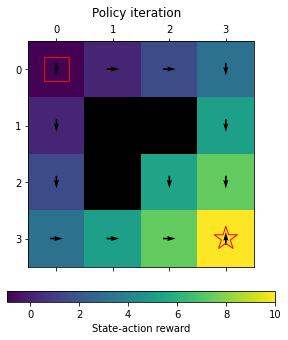

In [86]:
model = Model(small_world)
V, pi, mses = policy_iteration(model, n_episodes=100)
plot_vp(model, V, pi)
plt.suptitle('Policy iteration')
plt.show()

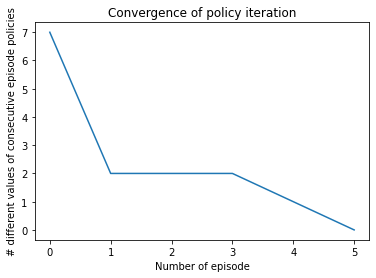

In [89]:
plot_mse_per_episode(mses, ylabel="# different values of consecutive episode policies", alg_name="policy iteration")

 17%|█▋        | 17/100 [00:00<00:01, 50.35it/s]


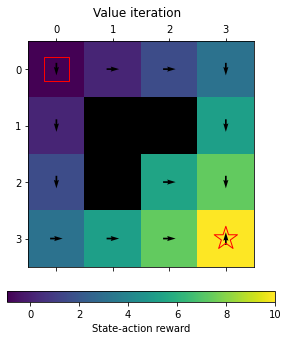

In [93]:
model = Model(small_world)
V, pi, mses = value_iteration(model, n_episodes=100)
plot_vp(model, V, pi)
plt.suptitle('Value iteration')
plt.show()

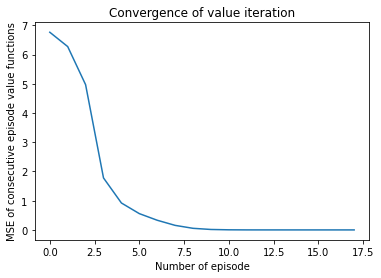

In [94]:
plot_mse_per_episode(mses, ylabel="MSE of consecutive episode value functions", alg_name="value iteration")

#### Cliff world

 12%|█▏        | 12/100 [00:04<00:36,  2.42it/s]


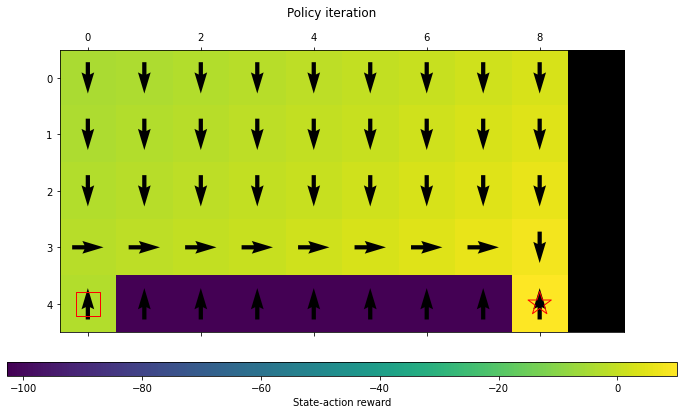

In [95]:
model = Model(cliff_world)
V, pi, mses = policy_iteration(model, n_episodes=100)
plot_vp(model, V, pi)
plt.suptitle('Policy iteration')
plt.show()

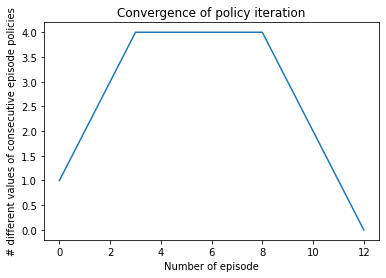

In [97]:
plot_mse_per_episode(mses, ylabel="# different values of consecutive episode policies", alg_name="policy iteration")

 13%|█▎        | 13/100 [00:01<00:12,  7.01it/s]


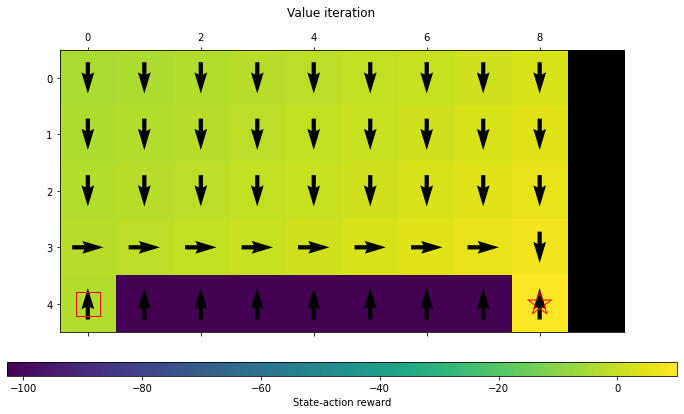

In [98]:
model = Model(cliff_world)
V, pi, mses = value_iteration(model, n_episodes=100)
plot_vp(model, V, pi)
plt.suptitle('Value iteration')
plt.show()

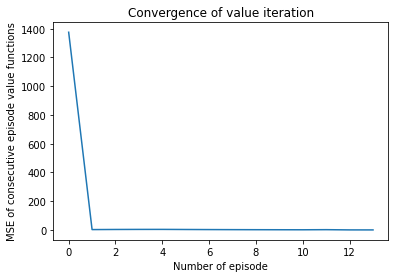

In [99]:
plot_mse_per_episode(mses, ylabel="MSE of consecutive episode value functions", alg_name="value iteration")

#### Grid world

  9%|▉         | 9/100 [00:23<04:01,  2.65s/it]


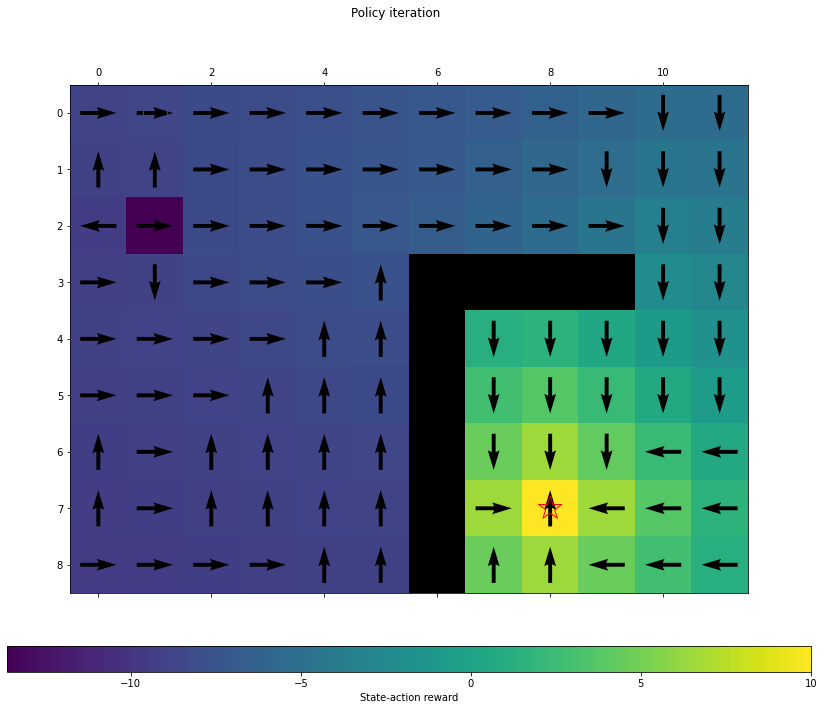

In [102]:
model = Model(grid_world)
V, pi, mses = policy_iteration(model, n_episodes=100)
plot_vp(model, V, pi)
plt.suptitle('Policy iteration')
plt.show()

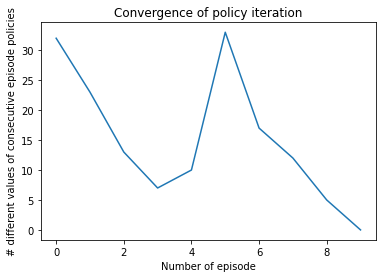

In [104]:
plot_mse_per_episode(mses, ylabel="# different values of consecutive episode policies", alg_name="policy iteration")

 33%|███▎      | 33/100 [00:22<00:45,  1.46it/s]


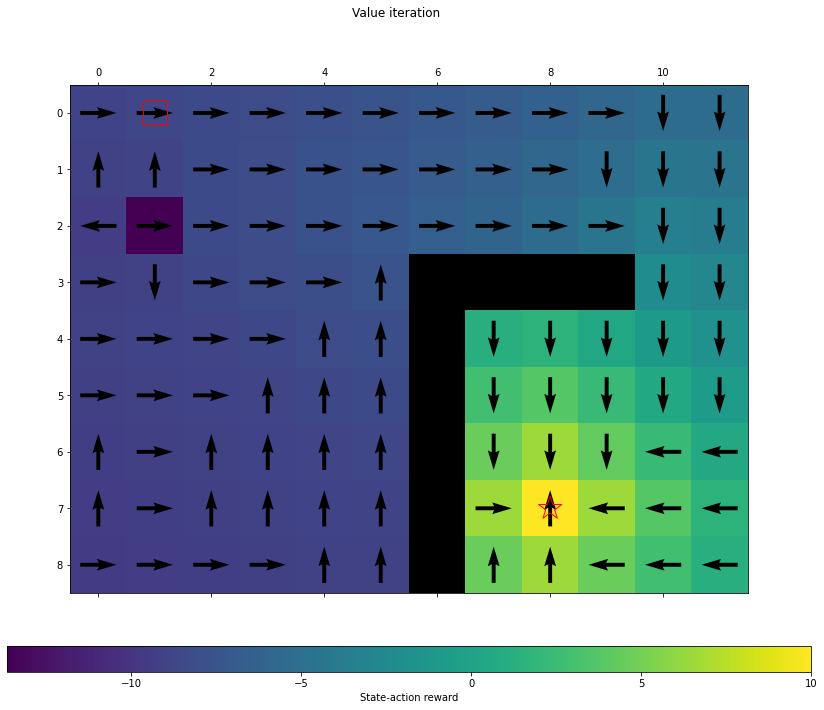

In [110]:
model = Model(grid_world)
V, pi, mses = value_iteration(model, n_episodes=100, tol=0.01)
plot_vp(model, V, pi)
plt.suptitle('Value iteration')
plt.show()

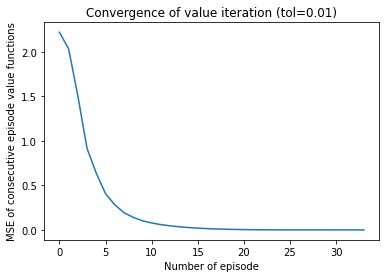

In [111]:
plot_mse_per_episode(mses, ylabel="MSE of consecutive episode value functions", alg_name="value iteration")

## Question 2

#### Exploration parameter: epsilon

100%|██████████| 500/500 [00:00<00:00, 1727.18it/s]


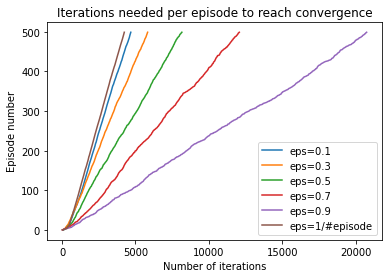

In [22]:
model = Model(small_world)
n_episodes = 500
maxit = 100

for eps in [0.1, 0.3, 0.5, 0.7, 0.9]:
    V, pi, cum_r, cum_iter = sarsa(model, n_episodes=n_episodes, maxit=maxit, epsilon=eps, decay_eps=False)
    plt.plot(cum_iter, range(n_episodes), label='eps='+str(eps))
V, pi, cum_r, cum_iter = sarsa(model, n_episodes=n_episodes, maxit=maxit, decay_eps=True)
plt.plot(cum_iter, range(n_episodes), label='eps=1/#episode')

plt.title("Iterations needed per episode to reach convergence")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()

#### Learning rate: alpha

100%|██████████| 500/500 [00:00<00:00, 812.73it/s]


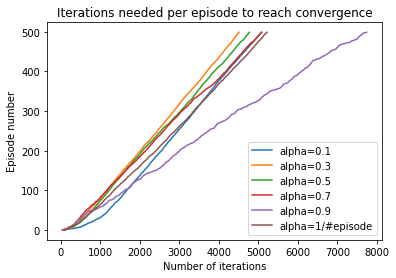

In [25]:
model = Model(small_world)
n_episodes = 500
maxit = 100

for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
    V, pi, cum_r, cum_iter = sarsa(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, decay_alpha=False)
    plt.plot(cum_iter, range(n_episodes), label='alpha='+str(alpha))
V, pi, cum_r, cum_iter = sarsa(model, n_episodes=n_episodes, maxit=maxit, decay_alpha=True)
plt.plot(cum_iter, range(n_episodes), label='alpha=1/#episode')

plt.title("Iterations needed per episode to reach convergence")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()

#### Number of episodes and iterations per episode

100%|██████████| 10/10 [00:00<00:00, 749.01it/s]


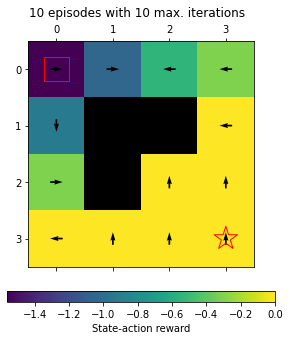

In [26]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=10, maxit=10, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("10 episodes with 10 max. iterations")
plt.show()

100%|██████████| 10/10 [00:00<00:00, 147.73it/s]


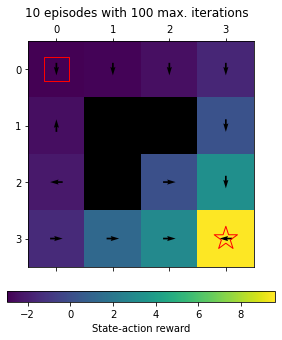

In [27]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=10, maxit=100, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("10 episodes with 100 max. iterations")
plt.show()

100%|██████████| 60/60 [00:00<00:00, 545.60it/s]


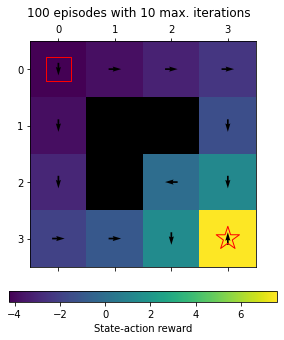

In [35]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=60, maxit=10, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("100 episodes with 10 max. iterations")
plt.show()

100%|██████████| 60/60 [00:00<00:00, 432.17it/s]


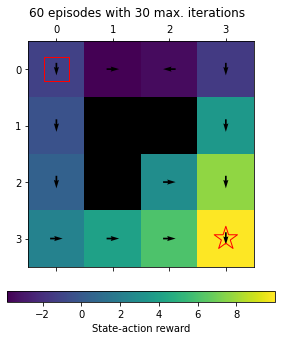

In [36]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=60, maxit=30, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("60 episodes with 30 max. iterations")
plt.show()

100%|██████████| 100/100 [00:00<00:00, 539.55it/s]


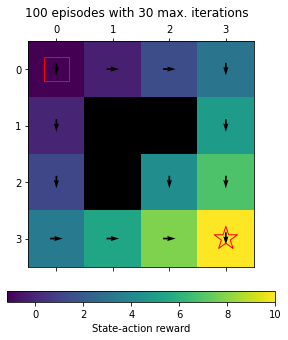

In [37]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=100, maxit=30, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("100 episodes with 30 max. iterations")
plt.show()

#### What happens if epsilon is too large or too small?

100%|██████████| 50/50 [00:00<00:00, 197.85it/s]


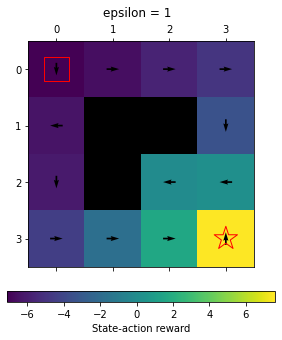

In [40]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=50, maxit=30, epsilon=1)
plot_vp(model, V, pi)
plt.suptitle("epsilon = 1")
plt.show()

100%|██████████| 100/100 [00:00<00:00, 614.24it/s]


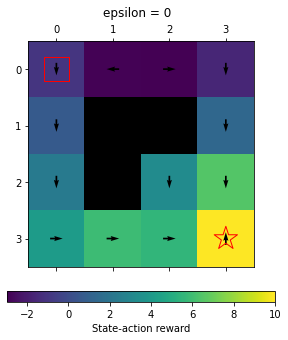

In [42]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=100, maxit=30, epsilon=0)
plot_vp(model, V, pi)
plt.suptitle("epsilon = 0")
plt.show()

#### What happens if alpha is too large or too small?

100%|██████████| 100/100 [00:00<00:00, 303.72it/s]


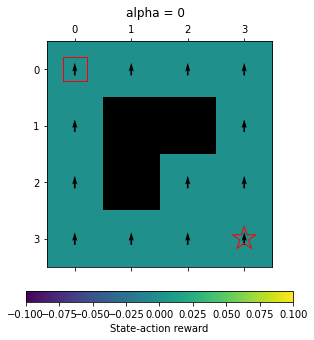

In [225]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=100, maxit=30, alpha=0)
plot_vp(model, V, pi)
plt.suptitle("alpha = 0")
plt.show()

100%|██████████| 100/100 [00:00<00:00, 256.50it/s]


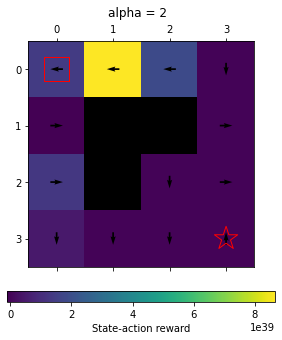

In [228]:
model = Model(small_world)
V, pi, _, _ = sarsa(model, n_episodes=100, maxit=30, alpha=2)
plot_vp(model, V, pi)
plt.suptitle("alpha = 2")
plt.show()

#### Expected SARSA

100%|██████████| 100/100 [00:00<00:00, 485.35it/s]


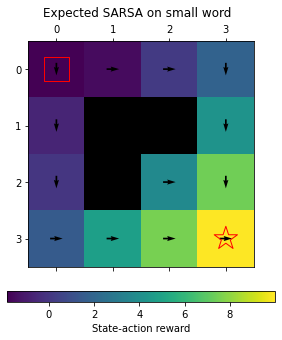

In [229]:
model = Model(small_world)
V, pi, _, _ = expected_sarsa(model, n_episodes=100, maxit=30, alpha=0.3)
plot_vp(model, V, pi)
plt.suptitle("Expected SARSA on small word")
plt.show()

100%|██████████| 2000/2000 [00:09<00:00, 219.58it/s]


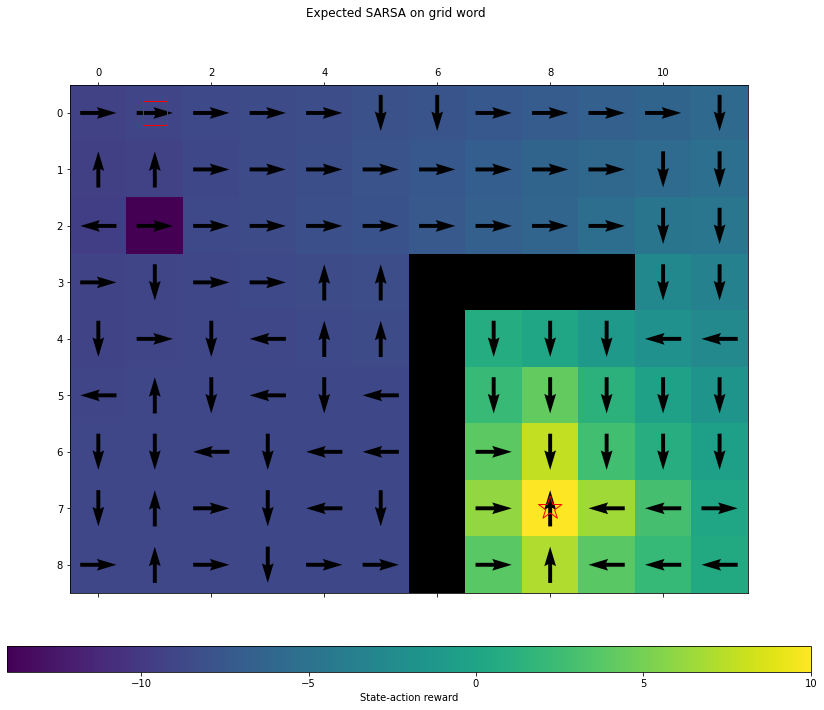

In [232]:
model = Model(grid_world)
V, pi, _, _ = expected_sarsa(model, n_episodes=2000, maxit=200, alpha=0.3)
plot_vp(model, V, pi)
plt.suptitle("Expected SARSA on grid word")
plt.show()

#### Sarsa vs Expected Sarsa: Efficiency

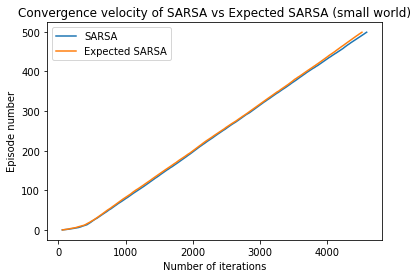

In [55]:
model = Model(small_world)

n_episodes = 500
maxit = 100
alpha = 0.3
eps = 0.1

sarsa_iters = np.zeros((n_episodes,))
exp_sarsa_iters = np.zeros((n_episodes,))

NREPS = 5

for i in range(NREPS):
    _, _, _, cum_iter_sarsa = sarsa(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, epsilon=eps)
    _, _, _, cum_iter_exp_sarsa = expected_sarsa(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, epsilon=eps)
    sarsa_iters += cum_iter_sarsa
    exp_sarsa_iters += cum_iter_exp_sarsa

sarsa_iters /= NREPS
exp_sarsa_iters /= NREPS

plt.plot(sarsa_iters, range(n_episodes), label='SARSA')
plt.plot(exp_sarsa_iters, range(n_episodes), label='Expected SARSA')
plt.title("Convergence velocity of SARSA vs Expected SARSA (small world)")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()

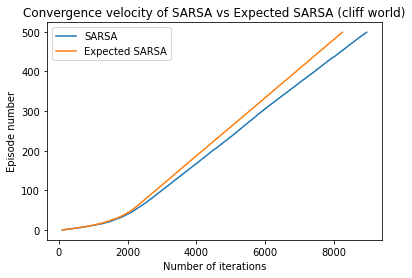

In [60]:
model = Model(cliff_world)

n_episodes = 500
maxit = 100
alpha = 0.3
eps = 0.1

sarsa_iters = np.zeros((n_episodes,))
exp_sarsa_iters = np.zeros((n_episodes,))

NREPS = 5

for i in range(NREPS):
    _, _, _, cum_iter_sarsa = sarsa(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, epsilon=eps)
    _, _, _, cum_iter_exp_sarsa = expected_sarsa(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, epsilon=eps)
    sarsa_iters += cum_iter_sarsa
    exp_sarsa_iters += cum_iter_exp_sarsa

sarsa_iters /= NREPS
exp_sarsa_iters /= NREPS

plt.plot(sarsa_iters, range(n_episodes), label='SARSA')
plt.plot(exp_sarsa_iters, range(n_episodes), label='Expected SARSA')
plt.title("Convergence velocity of SARSA vs Expected SARSA (cliff world)")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()

## Question 3

#### Explotation parameter: epsilon

100%|██████████| 500/500 [00:00<00:00, 1204.93it/s]


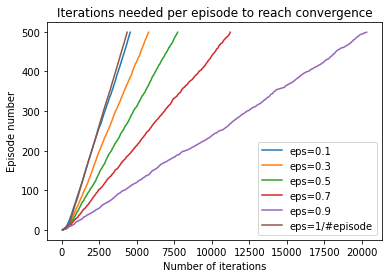

In [11]:
model = Model(small_world)
n_episodes = 500
maxit = 100

for eps in [0.1, 0.3, 0.5, 0.7, 0.9]:
    V, pi, cum_r, cum_iter = q_learning(model, n_episodes=n_episodes, maxit=maxit, epsilon=eps, decay_eps=False)
    plt.plot(cum_iter, range(n_episodes), label='eps='+str(eps))
V, pi, cum_r, cum_iter = q_learning(model, n_episodes=n_episodes, maxit=maxit, decay_eps=True)
plt.plot(cum_iter, range(n_episodes), label='eps=1/#episode')

plt.title("Iterations needed per episode to reach convergence")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()

#### Learning rate: alpha

100%|██████████| 500/500 [00:00<00:00, 1207.75it/s]


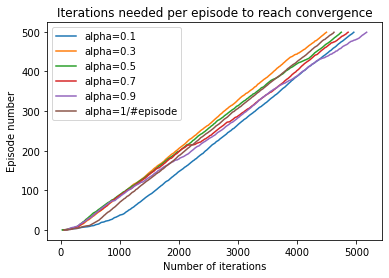

In [16]:
model = Model(small_world)
n_episodes = 500
maxit = 100

for alpha in [0.1, 0.3, 0.5, 0.7, 0.9]:
    V, pi, cum_r, cum_iter = q_learning(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, decay_alpha=False)
    plt.plot(cum_iter, range(n_episodes), label='alpha='+str(alpha))
V, pi, cum_r, cum_iter = q_learning(model, n_episodes=n_episodes, maxit=maxit, decay_alpha=True)
plt.plot(cum_iter, range(n_episodes), label='alpha=1/#episode')

plt.title("Iterations needed per episode to reach convergence")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()

#### Number of episodes and iterations per episode

100%|██████████| 10/10 [00:00<00:00, 830.57it/s]


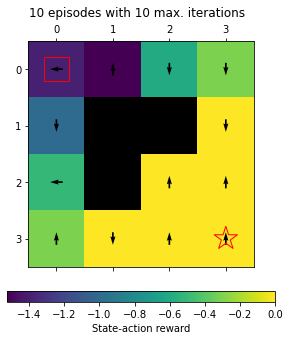

In [14]:
model = Model(small_world)
V, pi, _, _ = q_learning(model, n_episodes=10, maxit=10, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("10 episodes with 10 max. iterations")
plt.show()

100%|██████████| 100/100 [00:00<00:00, 494.48it/s]


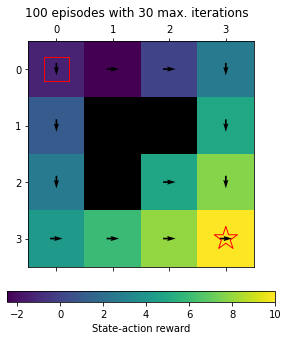

In [20]:
model = Model(small_world)
V, pi, _, _ = q_learning(model, n_episodes=100, maxit=30, alpha=0.3, decay_eps=True)
plot_vp(model, V, pi)
plt.suptitle("100 episodes with 30 max. iterations")
plt.show()

#### Sarsa vs Q Learning: Efficiency

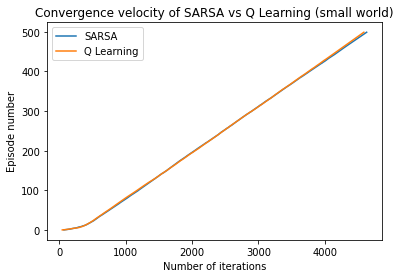

In [47]:
model = Model(small_world)

n_episodes = 500
maxit = 100
alpha = 0.3
eps = 0.1

sarsa_iters = np.zeros((n_episodes,))
ql_iters = np.zeros((n_episodes,))

NREPS = 5

for i in range(NREPS):
    _, _, _, cum_iter_sarsa = sarsa(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, epsilon=eps)
    _, _, _, cum_iter_ql = q_learning(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, epsilon=eps)
    sarsa_iters += cum_iter_sarsa
    ql_iters += cum_iter_ql

sarsa_iters /= NREPS
ql_iters /= NREPS

plt.plot(sarsa_iters, range(n_episodes), label='SARSA')
plt.plot(ql_iters, range(n_episodes), label='Q Learning')
plt.title("Convergence velocity of SARSA vs Q Learning (small world)")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()



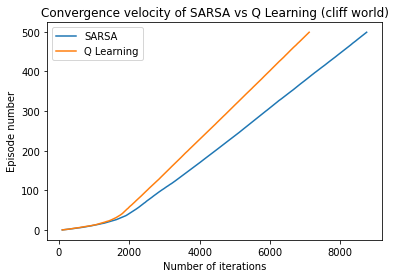

In [48]:
model = Model(cliff_world)

n_episodes = 500
maxit = 100
alpha = 0.3
eps = 0.1

sarsa_iters = np.zeros((n_episodes,))
ql_iters = np.zeros((n_episodes,))

NREPS = 5

for i in range(NREPS):
    _, _, _, cum_iter_sarsa = sarsa(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, epsilon=eps)
    _, _, _, cum_iter_ql = q_learning(model, n_episodes=n_episodes, maxit=maxit, alpha=alpha, epsilon=eps)
    sarsa_iters += cum_iter_sarsa
    ql_iters += cum_iter_ql

sarsa_iters /= NREPS
ql_iters /= NREPS

plt.plot(sarsa_iters, range(n_episodes), label='SARSA')
plt.plot(ql_iters, range(n_episodes), label='Q Learning')
plt.title("Convergence velocity of SARSA vs Q Learning (cliff world)")
plt.xlabel("Number of iterations")
plt.ylabel("Episode number")
plt.legend()
plt.show()



## Question 4

In [26]:
from scipy.ndimage.filters import uniform_filter1d

def plot_cum_rewards(cum_r_sarsa, cum_r_ql, epsilon=0.1, min_val=None):
    y_sarsa = uniform_filter1d(cum_r_sarsa, size=40)
    y_ql = uniform_filter1d(cum_r_ql, size=40)

    plt.plot(range(len(y_sarsa)), y_sarsa, label='SARSA')
    plt.plot(range(len(y_ql)), y_ql, label='Q Learning')
    if not min_val:
        min_val = max(np.min(y_sarsa), np.min(y_ql))
    plt.ylim(min_val, 10)
    plt.xlabel("Number of episode")
    plt.ylabel("Cumulative reward")
    plt.title("Rewards obtained in each episode - (" + r"$\epsilon = "+str(epsilon)+"$)")
    plt.legend()
    plt.show()

#### Decaying epsilon 

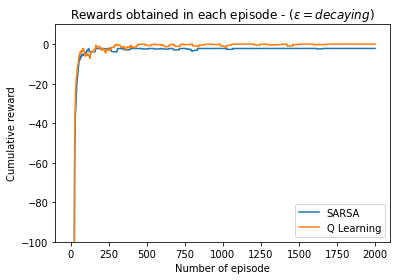

In [49]:
model = Model(cliff_world)

NREPS = 10
episodes = 2000
maxit = 100
alpha = 0.3
epsilon = 0.1
decay = True

V_sarsa, pi_sarsa, cumR_sarsa, _ = sarsa(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)
V_ql, pi_ql, cumR_ql, _ = q_learning(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)

cum_sarsa = cumR_sarsa
cum_ql = cumR_ql

for i in range(NREPS):
    V_sarsa, pi_sarsa, cumR_sarsa, _ = sarsa(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)
    V_ql, pi_ql, cumR_ql, _ = q_learning(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)
    cum_sarsa += cumR_sarsa
    cum_ql += cumR_ql

cum_sarsa /= (NREPS+1)
cum_ql /= (NREPS+1)

plot_cum_rewards(cum_sarsa, cum_ql, epsilon="decaying", min_val=-100)

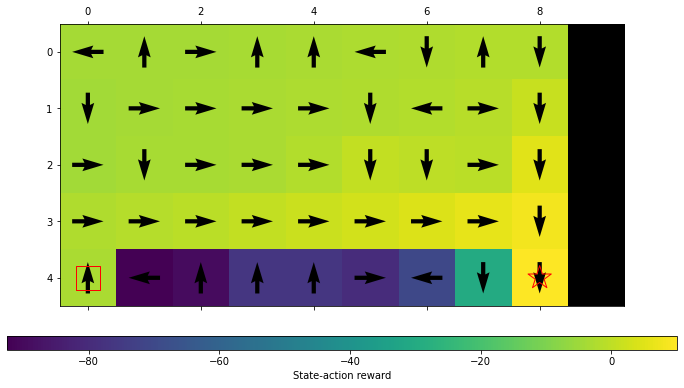

In [50]:
plot_vp(model, V_ql, pi_ql)
plt.show()

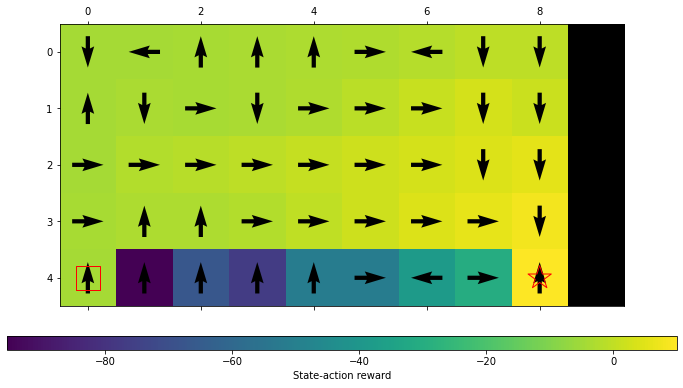

In [51]:
plot_vp(model, V_sarsa, pi_sarsa)
plt.show()

#### Epsilon = 0.1

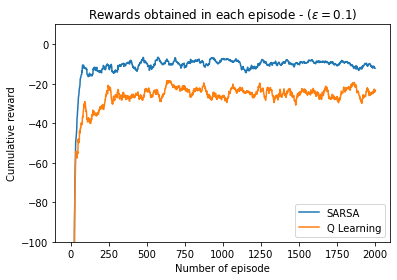

In [33]:
model = Model(cliff_world)

NREPS = 10
episodes = 2000
maxit = 100
alpha = 0.3
epsilon = 0.1
decay = False

V_sarsa, pi_sarsa, cumR_sarsa, _ = sarsa(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)
V_ql, pi_ql, cumR_ql, _ = q_learning(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)

cum_sarsa = cumR_sarsa
cum_ql = cumR_ql

for i in range(NREPS):
    V_sarsa, pi_sarsa, cumR_sarsa, _ = sarsa(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)
    V_ql, pi_ql, cumR_ql, _ = q_learning(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)
    cum_sarsa += cumR_sarsa
    cum_ql += cumR_ql

cum_sarsa /= (NREPS+1)
cum_ql /= (NREPS+1)

plot_cum_rewards(cum_sarsa, cum_ql, epsilon=epsilon, min_val=-100)

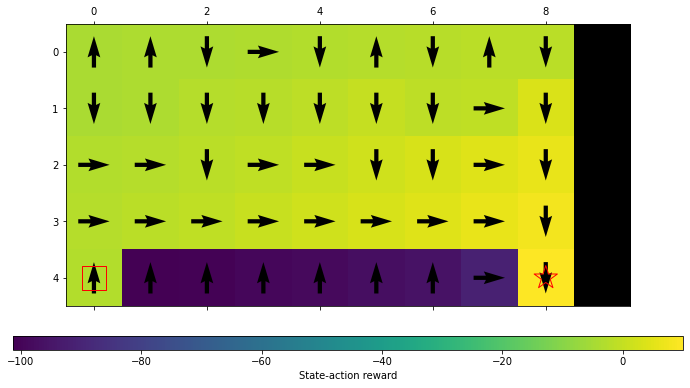

In [34]:
plot_vp(model, V_ql, pi_ql)
plt.show()

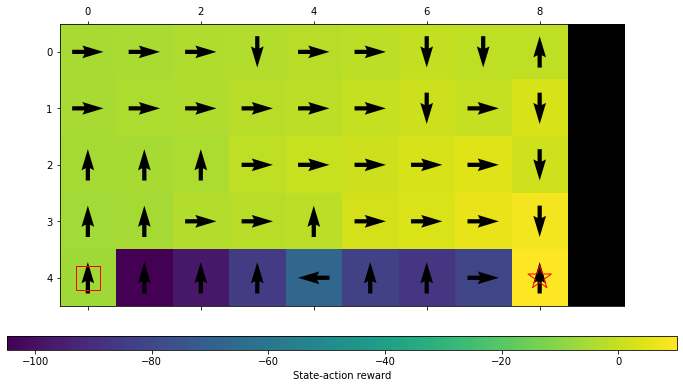

In [35]:
plot_vp(model, V_sarsa, pi_sarsa)
plt.show()

#### Epsilon = 0.4

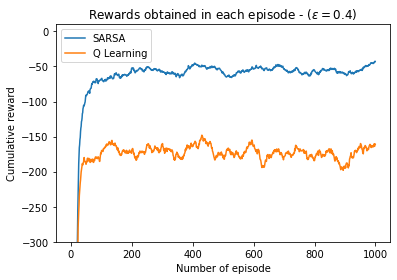

In [55]:
model = Model(cliff_world)

NREPS = 10
episodes = 1000
maxit = 100
alpha = 0.3
epsilon = 0.4
decay = False

V_sarsa, pi_sarsa, cumR_sarsa, _ = sarsa(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)
V_ql, pi_ql, cumR_ql, _ = q_learning(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)

cum_sarsa = cumR_sarsa
cum_ql = cumR_ql

for i in range(NREPS):
    V_sarsa, pi_sarsa, cumR_sarsa, _ = sarsa(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)
    V_ql, pi_ql, cumR_ql, _ = q_learning(model, n_episodes=episodes, maxit=maxit, alpha=alpha, epsilon=epsilon, decay_eps=decay)
    cum_sarsa += cumR_sarsa
    cum_ql += cumR_ql

cum_sarsa /= (NREPS+1)
cum_ql /= (NREPS+1)

plot_cum_rewards(cum_sarsa, cum_ql, epsilon=epsilon, min_val=-300)

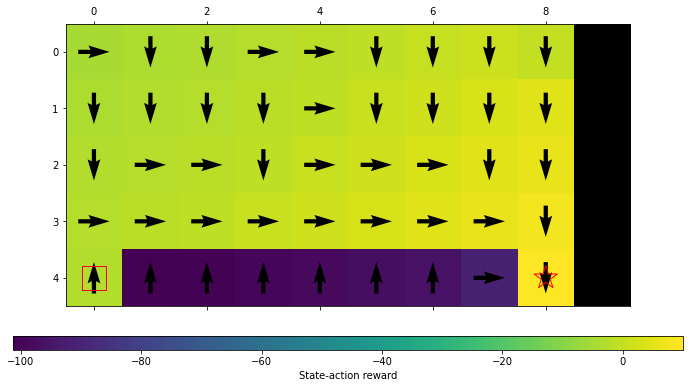

In [56]:
plot_vp(model, V_ql, pi_ql)
plt.show()

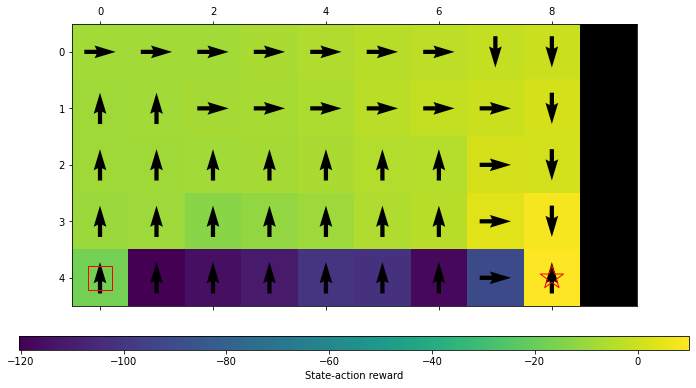

In [57]:
plot_vp(model, V_sarsa, pi_sarsa)
plt.show()

## Question 5

## Other exps